In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import umap

In [2]:
df = pd.read_csv('Pokemon.csv')

In [3]:
df.shape

(800, 13)

In [4]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
df_legendary = df.loc[df['Legendary'] == True]
df_normal = df.loc[df['Legendary'] == False]

In [6]:
df_legendary.mean()

#             470.215385
Total         637.384615
HP             92.738462
Attack        116.676923
Defense        99.661538
Sp. Atk       122.184615
Sp. Def       105.938462
Speed         100.184615
Generation      3.769231
Legendary       1.000000
dtype: float64

In [7]:
df_normal.mean()

#             353.315646
Total         417.213605
HP             67.182313
Attack         75.669388
Defense        71.559184
Sp. Atk        68.454422
Sp. Def        68.892517
Speed          65.455782
Generation      3.284354
Legendary       0.000000
dtype: float64

In [8]:
df['Legendary'].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

In [9]:
df_num = df[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']]

In [10]:
#getting dummies of categorical variables
df_dummies = pd.get_dummies(df[['Type 1', 'Type 2']], drop_first=True)

In [11]:
#selecting descriptive features and target data
X = pd.concat([df_num, df_dummies], axis=1)
y = df['Legendary']

#standardizing data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# PCA

In [12]:
#performing PCA
pca = PCA(n_components=2)

pca_components = pca.fit_transform(X_std)

#evaluate how much variance is explained by first two principle components
pca.explained_variance_ratio_

array([0.09315741, 0.04485219])

We should note that when using only two components we can only explain about half of the variance in the data. This being said, we should not expect a perfect representation in the visualization that uses only these components. 

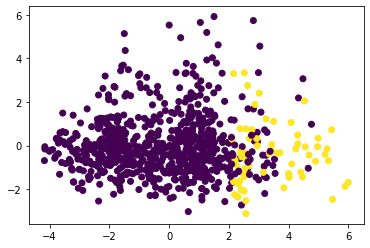

In [13]:
#visualize using first two components of PCA
plt.scatter(pca_components[:,0], pca_components[:,1], c=y)

# t-SNE

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 800 samples in 0.002s...
[t-SNE] Computed neighbors for 800 samples in 0.034s...
[t-SNE] Computed conditional probabilities for sample 800 / 800
[t-SNE] Mean sigma: 1.238740
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.943295
[t-SNE] KL divergence after 300 iterations: 1.029332


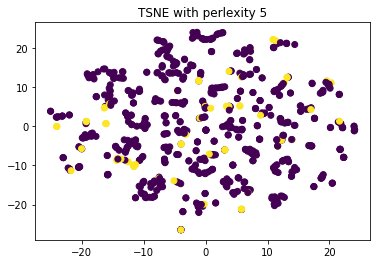

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 800 samples in 0.001s...
[t-SNE] Computed neighbors for 800 samples in 0.043s...
[t-SNE] Computed conditional probabilities for sample 800 / 800
[t-SNE] Mean sigma: 2.020351
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.193535
[t-SNE] KL divergence after 300 iterations: 0.653938


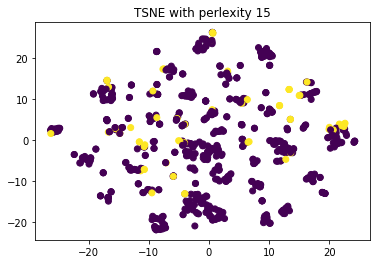

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 800 samples in 0.002s...
[t-SNE] Computed neighbors for 800 samples in 0.042s...
[t-SNE] Computed conditional probabilities for sample 800 / 800
[t-SNE] Mean sigma: 2.425922
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.099648
[t-SNE] KL divergence after 300 iterations: 0.608120


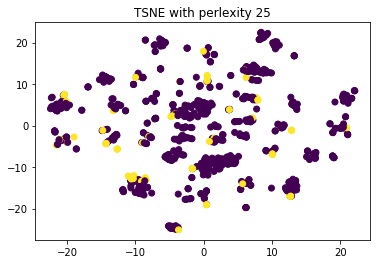

[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 800 samples in 0.001s...
[t-SNE] Computed neighbors for 800 samples in 0.046s...
[t-SNE] Computed conditional probabilities for sample 800 / 800
[t-SNE] Mean sigma: 2.673498
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.511955
[t-SNE] KL divergence after 300 iterations: 0.634690


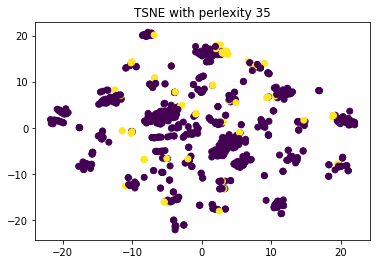

[t-SNE] Computing 136 nearest neighbors...
[t-SNE] Indexed 800 samples in 0.002s...
[t-SNE] Computed neighbors for 800 samples in 0.051s...
[t-SNE] Computed conditional probabilities for sample 800 / 800
[t-SNE] Mean sigma: 2.837240
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.649384
[t-SNE] KL divergence after 300 iterations: 0.692010


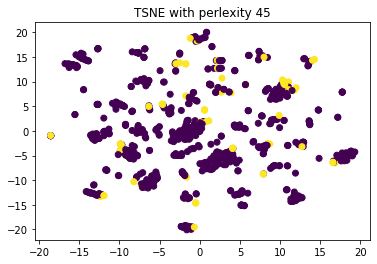

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 800 samples in 0.001s...
[t-SNE] Computed neighbors for 800 samples in 0.052s...
[t-SNE] Computed conditional probabilities for sample 800 / 800
[t-SNE] Mean sigma: 2.899908
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.085129
[t-SNE] KL divergence after 300 iterations: 0.695482


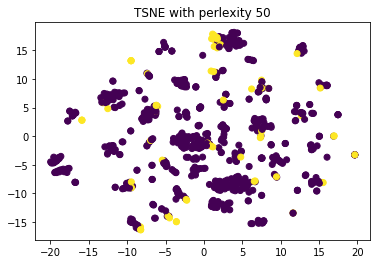

In [14]:
perplex = [5, 15, 25, 35, 45, 50]

for j in perplex:
    tsne =TSNE(n_components=2, verbose=1, perplexity=j, n_iter=300)
    tsne_results = tsne.fit_transform(X_std)

    plt.scatter(tsne_results[:,0], tsne_results[:,1], c=y)
    plt.title('TSNE with perlexity {}'.format(j))
    plt.show()

# UMAP

c:\python\python37\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 18 separate connected components using meta-embedding (experimental)
  n_components


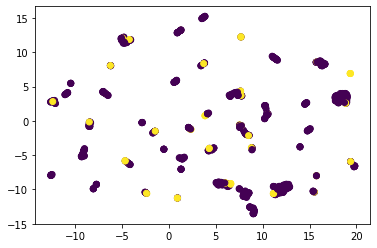

c:\python\python37\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 18 separate connected components using meta-embedding (experimental)
  n_components


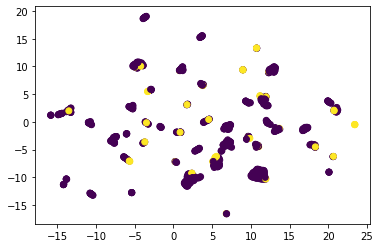

c:\python\python37\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 18 separate connected components using meta-embedding (experimental)
  n_components


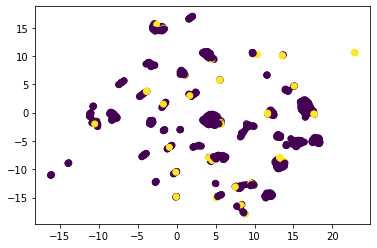

c:\python\python37\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 18 separate connected components using meta-embedding (experimental)
  n_components


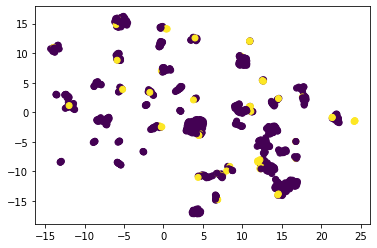

In [15]:
dist = [.1, .2, .3, .4]

for d in dist:
    umap_results = umap.UMAP(n_neighbors=5, min_dist=d, metric='correlation').fit_transform(X_std)
    plt.scatter(umap_results[:,0], umap_results[:,1], c=y)
    plt.show()

# KMeans

In [16]:
k_means = KMeans(n_clusters=2, random_state=123)
k_means.fit(pca_components)
y_pred = k_means.predict(pca_components)

In [17]:
y_pred = np.array([0 if x == 1 else 1 if x == 0 else 2 for x in y_pred])

In [18]:
print('ARI: {}'.format(metrics.adjusted_rand_score(y,y_pred)))
print('Silhouette Score: {}'.format(metrics.silhouette_score(X_std, y_pred, metric='euclidean')))
pd.crosstab(y, y_pred)

ARI: 0.007630933598415241
Silhouette Score: 0.06721169825822422


col_0,0,1
Legendary,,
False,376,359
True,0,65


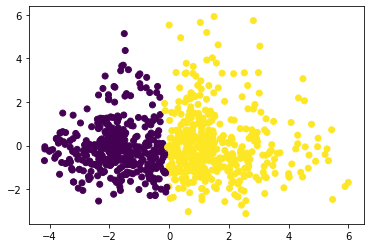

In [19]:
#pca = PCA(n_components=2).fit_transform(X_std)

plt.scatter(pca_components[:,0], pca_components[:,1], c=y_pred)
plt.show()

# Hierarchical clustering

In [20]:
agg_cluster = AgglomerativeClustering(linkage='complete', affinity='cosine', n_clusters=2)

y_pred = agg_cluster.fit_predict(X_std)

In [21]:
print('ARI: {}'.format(metrics.adjusted_rand_score(y, y_pred)))
print('Silhouette Score: {}'.format(metrics.silhouette_score(X_std, y_pred, metric='euclidean')))
pd.crosstab(y, y_pred)

ARI: -0.0060323310106850875
Silhouette Score: 0.02879738081159229


col_0,0,1
Legendary,,
False,351,384
True,13,52


# DBSCAN

In [78]:
dbscan_cluster = DBSCAN(eps=10, min_samples=5)

y_pred = dbscan_cluster.fit_predict(X_std)

print('ARI: {}'.format(metrics.adjusted_rand_score(y,y_pred)))
print('Silhouette Score: {}'.format(metrics.silhouette_score(X_std, y_pred, metric='euclidean')))
pd.crosstab(y, y_pred)

ARI: 0.04387046634746413
Silhouette Score: 0.37973199162554766


col_0,-1,0,1
Legendary,,,
False,6,724,5
True,2,62,1


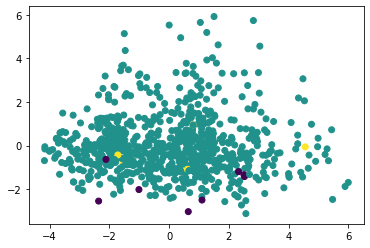

In [59]:
plt.scatter(pca_components[:,0], pca_components[:,1], c=y_pred)
plt.show()

# GMM

In [82]:
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

y_pred = gmm_cluster.fit_predict(X_std)

print('ARI: {}'.format(metrics.adjusted_rand_score(y,y_pred)))
print('Silhouette Score: {}'.format(metrics.silhouette_score(X_std, y_pred, metric='euclidean')))
pd.crosstab(y, y_pred)

ARI: 0.03008277385742057
Silhouette Score: 0.02250153334256982


col_0,0,1
Legendary,,
False,291,444
True,44,21
